In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import math as mt
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [167]:
data = pd.read_csv('Zillow_Feature_Engineering_Dataset.csv')

In [168]:
data_copy = data.copy()

In [169]:
data.shape

(90275, 60)

In [170]:
data.head(10)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,17073783,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,...,115087.0,191811.0,2015.0,76724.0,2015.06,NaN,NaN,6.111002e+13,0.0953,2016-01-27
1,17088994,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,...,143809.0,239679.0,2015.0,95870.0,2581.30,NaN,NaN,6.111002e+13,0.0198,2016-03-30
2,17100444,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,33619.0,47853.0,2015.0,14234.0,591.64,NaN,NaN,6.111001e+13,0.0060,2016-05-27
3,17102429,NaN,NaN,NaN,1.5,2.0,NaN,NaN,1.5,NaN,...,45609.0,62914.0,2015.0,17305.0,682.78,NaN,NaN,6.111001e+13,-0.0566,2016-06-07
4,17109604,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,...,277000.0,554000.0,2015.0,277000.0,5886.92,NaN,NaN,6.111001e+13,0.0573,2016-08-08
5,17125829,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,66.0,...,222070.0,289609.0,2015.0,67539.0,3110.44,NaN,NaN,6.111005e+13,0.0564,2016-08-26
6,17132911,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,185000.0,526000.0,2015.0,341000.0,5632.20,NaN,NaN,6.111006e+13,0.0315,2016-07-08
7,17134926,NaN,NaN,NaN,2.5,5.0,NaN,NaN,2.5,NaN,...,342611.0,571086.0,2015.0,228475.0,6109.94,NaN,NaN,6.111006e+13,0.0257,2016-05-11
8,17139988,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,231297.0,462594.0,2015.0,231297.0,5026.40,NaN,NaN,6.111005e+13,0.0020,2016-06-15
9,17167359,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0,NaN,...,134251.0,268502.0,2015.0,134251.0,3217.06,NaN,NaN,6.111004e+13,-0.0576,2016-05-27


In [ ]:
# Duplicate Id check and removal

In [171]:
duplicate = data[data.duplicated('parcelid')]
duplicate.shape

(125, 60)

In [ ]:
# From (125, 60)  we see that there are 125 rows of duplicate data w.r.t. parcelid.

In [ ]:
# We will drop this duplicate data

In [172]:
data.drop_duplicates(subset ="parcelid", keep = 'first', inplace = True)

In [173]:
data.shape

(90150, 60)

In [ ]:
# Analysing Missing Values

In [174]:
data.isnull().mean()*100

parcelid                         0.000000
airconditioningtypeid           68.110926
architecturalstyletypeid        99.711592
basementsqft                    99.952302
bathroomcnt                      0.000000
bedroomcnt                       0.000000
buildingclasstypeid             99.982252
buildingqualitytypeid           36.457016
calculatedbathnbr                1.304493
decktypeid                      99.270105
finishedfloor1squarefeet        92.401553
calculatedfinishedsquarefeet     0.729895
finishedsquarefeet12             5.174709
finishedsquarefeet13            99.963394
finishedsquarefeet15            96.056572
finishedsquarefeet50            92.401553
finishedsquarefeet6             99.535219
fips                             0.000000
fireplacecnt                    89.354409
fullbathcnt                      1.304493
garagecarcnt                    66.836384
garagetotalsqft                 66.836384
hashottuborspa                  97.378813
heatingorsystemtypeid           37

In [ ]:
# Dropping the columns which have more than 60% of missing values and perform feature engineering on rest of the data

In [175]:
def drop_columns_with_max_60_missing_values(df):
    missing_var = []
    for var in df.columns:
        if df[var].isnull().sum() > 0:
            missing_var.append(var)
    
    limit = np.abs((df.shape[0] * 0.6))
    
    var_dropped = []
    for var in missing_var:
        if df[var].isnull().sum() > limit:
            var_dropped.append(var)
    
    print('Columns with >= 60% missing values: \n', var_dropped)
    
    data.drop(columns=var_dropped, axis=1, inplace=True)
    
    print('Remaining Columns========================================: \n', data.columns)
    return data
            
data = drop_columns_with_max_60_missing_values(data)

Columns with >= 60% missing values: 
 ['airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft', 'buildingclasstypeid', 'decktypeid', 'finishedfloor1squarefeet', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6', 'fireplacecnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'regionidneighborhood', 'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid', 'yardbuildingsqft17', 'yardbuildingsqft26', 'numberofstories', 'fireplaceflag', 'taxdelinquencyflag', 'taxdelinquencyyear']
Remaining Columns========================================: 
 Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fips', 'fullbathcnt', 'heatingorsystemtypeid',
       'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode', 'propertylanduset

In [176]:
data.shape

(90150, 31)

In [177]:
data.head(10)

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,...,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate
0,17073783,2.5,3.0,NaN,2.5,1264.0,1264.0,6111.0,2.0,NaN,...,NaN,1986.0,115087.0,191811.0,2015.0,76724.0,2015.06,6.111002e+13,0.0953,2016-01-27
1,17088994,1.0,2.0,NaN,1.0,777.0,777.0,6111.0,1.0,NaN,...,NaN,1990.0,143809.0,239679.0,2015.0,95870.0,2581.30,6.111002e+13,0.0198,2016-03-30
2,17100444,2.0,3.0,NaN,2.0,1101.0,1101.0,6111.0,2.0,NaN,...,NaN,1956.0,33619.0,47853.0,2015.0,14234.0,591.64,6.111001e+13,0.0060,2016-05-27
3,17102429,1.5,2.0,NaN,1.5,1554.0,1554.0,6111.0,1.0,NaN,...,NaN,1965.0,45609.0,62914.0,2015.0,17305.0,682.78,6.111001e+13,-0.0566,2016-06-07
4,17109604,2.5,4.0,NaN,2.5,2415.0,2415.0,6111.0,2.0,NaN,...,NaN,1984.0,277000.0,554000.0,2015.0,277000.0,5886.92,6.111001e+13,0.0573,2016-08-08
5,17125829,2.5,4.0,NaN,2.5,2882.0,2882.0,6111.0,2.0,NaN,...,NaN,1980.0,222070.0,289609.0,2015.0,67539.0,3110.44,6.111005e+13,0.0564,2016-08-26
6,17132911,2.0,3.0,NaN,2.0,1772.0,1772.0,6111.0,2.0,NaN,...,NaN,1978.0,185000.0,526000.0,2015.0,341000.0,5632.20,6.111006e+13,0.0315,2016-07-08
7,17134926,2.5,5.0,NaN,2.5,2632.0,2632.0,6111.0,2.0,NaN,...,NaN,1971.0,342611.0,571086.0,2015.0,228475.0,6109.94,6.111006e+13,0.0257,2016-05-11
8,17139988,2.0,3.0,NaN,2.0,1292.0,1292.0,6111.0,2.0,NaN,...,NaN,1979.0,231297.0,462594.0,2015.0,231297.0,5026.40,6.111005e+13,0.0020,2016-06-15
9,17167359,1.0,3.0,NaN,1.0,1385.0,1385.0,6111.0,1.0,NaN,...,NaN,1950.0,134251.0,268502.0,2015.0,134251.0,3217.06,6.111004e+13,-0.0576,2016-05-27


In [ ]:
# Capture Elapsed Time

In [178]:
data['yeardifference'] = data['assessmentyear'] - data['yearbuilt']

In [179]:
data.head(10)

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,yeardifference
0,17073783,2.5,3.0,NaN,2.5,1264.0,1264.0,6111.0,2.0,NaN,...,1986.0,115087.0,191811.0,2015.0,76724.0,2015.06,6.111002e+13,0.0953,2016-01-27,29.0
1,17088994,1.0,2.0,NaN,1.0,777.0,777.0,6111.0,1.0,NaN,...,1990.0,143809.0,239679.0,2015.0,95870.0,2581.30,6.111002e+13,0.0198,2016-03-30,25.0
2,17100444,2.0,3.0,NaN,2.0,1101.0,1101.0,6111.0,2.0,NaN,...,1956.0,33619.0,47853.0,2015.0,14234.0,591.64,6.111001e+13,0.0060,2016-05-27,59.0
3,17102429,1.5,2.0,NaN,1.5,1554.0,1554.0,6111.0,1.0,NaN,...,1965.0,45609.0,62914.0,2015.0,17305.0,682.78,6.111001e+13,-0.0566,2016-06-07,50.0
4,17109604,2.5,4.0,NaN,2.5,2415.0,2415.0,6111.0,2.0,NaN,...,1984.0,277000.0,554000.0,2015.0,277000.0,5886.92,6.111001e+13,0.0573,2016-08-08,31.0
5,17125829,2.5,4.0,NaN,2.5,2882.0,2882.0,6111.0,2.0,NaN,...,1980.0,222070.0,289609.0,2015.0,67539.0,3110.44,6.111005e+13,0.0564,2016-08-26,35.0
6,17132911,2.0,3.0,NaN,2.0,1772.0,1772.0,6111.0,2.0,NaN,...,1978.0,185000.0,526000.0,2015.0,341000.0,5632.20,6.111006e+13,0.0315,2016-07-08,37.0
7,17134926,2.5,5.0,NaN,2.5,2632.0,2632.0,6111.0,2.0,NaN,...,1971.0,342611.0,571086.0,2015.0,228475.0,6109.94,6.111006e+13,0.0257,2016-05-11,44.0
8,17139988,2.0,3.0,NaN,2.0,1292.0,1292.0,6111.0,2.0,NaN,...,1979.0,231297.0,462594.0,2015.0,231297.0,5026.40,6.111005e+13,0.0020,2016-06-15,36.0
9,17167359,1.0,3.0,NaN,1.0,1385.0,1385.0,6111.0,1.0,NaN,...,1950.0,134251.0,268502.0,2015.0,134251.0,3217.06,6.111004e+13,-0.0576,2016-05-27,65.0


In [180]:
data.drop(columns=['assessmentyear', 'yearbuilt', 'transactiondate'], axis=1, inplace=True)

In [181]:
data.shape

(90150, 29)

In [182]:
data.head(10)

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,...,regionidzip,roomcnt,unitcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,yeardifference
0,17073783,2.5,3.0,NaN,2.5,1264.0,1264.0,6111.0,2.0,NaN,...,97081.0,5.0,NaN,115087.0,191811.0,76724.0,2015.06,6.111002e+13,0.0953,29.0
1,17088994,1.0,2.0,NaN,1.0,777.0,777.0,6111.0,1.0,NaN,...,97083.0,4.0,NaN,143809.0,239679.0,95870.0,2581.30,6.111002e+13,0.0198,25.0
2,17100444,2.0,3.0,NaN,2.0,1101.0,1101.0,6111.0,2.0,NaN,...,97113.0,5.0,NaN,33619.0,47853.0,14234.0,591.64,6.111001e+13,0.0060,59.0
3,17102429,1.5,2.0,NaN,1.5,1554.0,1554.0,6111.0,1.0,NaN,...,97113.0,5.0,NaN,45609.0,62914.0,17305.0,682.78,6.111001e+13,-0.0566,50.0
4,17109604,2.5,4.0,NaN,2.5,2415.0,2415.0,6111.0,2.0,NaN,...,97084.0,8.0,NaN,277000.0,554000.0,277000.0,5886.92,6.111001e+13,0.0573,31.0
5,17125829,2.5,4.0,NaN,2.5,2882.0,2882.0,6111.0,2.0,NaN,...,97089.0,8.0,NaN,222070.0,289609.0,67539.0,3110.44,6.111005e+13,0.0564,35.0
6,17132911,2.0,3.0,NaN,2.0,1772.0,1772.0,6111.0,2.0,NaN,...,97089.0,6.0,NaN,185000.0,526000.0,341000.0,5632.20,6.111006e+13,0.0315,37.0
7,17134926,2.5,5.0,NaN,2.5,2632.0,2632.0,6111.0,2.0,NaN,...,97089.0,8.0,NaN,342611.0,571086.0,228475.0,6109.94,6.111006e+13,0.0257,44.0
8,17139988,2.0,3.0,NaN,2.0,1292.0,1292.0,6111.0,2.0,NaN,...,97091.0,6.0,NaN,231297.0,462594.0,231297.0,5026.40,6.111005e+13,0.0020,36.0
9,17167359,1.0,3.0,NaN,1.0,1385.0,1385.0,6111.0,1.0,NaN,...,97104.0,6.0,NaN,134251.0,268502.0,134251.0,3217.06,6.111004e+13,-0.0576,65.0


In [ ]:
# Transforming Incorrectly Scaled Variables
# Latitude and Longitude has been multiplied to 10^6
# rawcensustractandblock - 10^6
# censustractandblock - 10^12

In [183]:
data[['latitude', 'longitude']] = (data[['latitude', 'longitude']])/(10**6)

data['censustractandblock'] = (data['censustractandblock'])/(10**12)

data['rawcensustractandblock'] = (data['rawcensustractandblock'])/(10**6)

In [184]:
data.head(10)

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,...,regionidzip,roomcnt,unitcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,yeardifference
0,17073783,2.5,3.0,NaN,2.5,1264.0,1264.0,6111.0,2.0,NaN,...,97081.0,5.0,NaN,115087.0,191811.0,76724.0,2015.06,61.110022,0.0953,29.0
1,17088994,1.0,2.0,NaN,1.0,777.0,777.0,6111.0,1.0,NaN,...,97083.0,4.0,NaN,143809.0,239679.0,95870.0,2581.30,61.110015,0.0198,25.0
2,17100444,2.0,3.0,NaN,2.0,1101.0,1101.0,6111.0,2.0,NaN,...,97113.0,5.0,NaN,33619.0,47853.0,14234.0,591.64,61.110007,0.0060,59.0
3,17102429,1.5,2.0,NaN,1.5,1554.0,1554.0,6111.0,1.0,NaN,...,97113.0,5.0,NaN,45609.0,62914.0,17305.0,682.78,61.110008,-0.0566,50.0
4,17109604,2.5,4.0,NaN,2.5,2415.0,2415.0,6111.0,2.0,NaN,...,97084.0,8.0,NaN,277000.0,554000.0,277000.0,5886.92,61.110014,0.0573,31.0
5,17125829,2.5,4.0,NaN,2.5,2882.0,2882.0,6111.0,2.0,NaN,...,97089.0,8.0,NaN,222070.0,289609.0,67539.0,3110.44,61.110052,0.0564,35.0
6,17132911,2.0,3.0,NaN,2.0,1772.0,1772.0,6111.0,2.0,NaN,...,97089.0,6.0,NaN,185000.0,526000.0,341000.0,5632.20,61.110055,0.0315,37.0
7,17134926,2.5,5.0,NaN,2.5,2632.0,2632.0,6111.0,2.0,NaN,...,97089.0,8.0,NaN,342611.0,571086.0,228475.0,6109.94,61.110055,0.0257,44.0
8,17139988,2.0,3.0,NaN,2.0,1292.0,1292.0,6111.0,2.0,NaN,...,97091.0,6.0,NaN,231297.0,462594.0,231297.0,5026.40,61.110053,0.0020,36.0
9,17167359,1.0,3.0,NaN,1.0,1385.0,1385.0,6111.0,1.0,NaN,...,97104.0,6.0,NaN,134251.0,268502.0,134251.0,3217.06,61.110039,-0.0576,65.0


In [ ]:
# Missing Values - Replacing missing values in the original variable with the mode

In [185]:
data.isnull().sum()

parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           32866
calculatedbathnbr                1176
calculatedfinishedsquarefeet      658
finishedsquarefeet12             4665
fips                                0
fullbathcnt                      1176
heatingorsystemtypeid           34145
latitude                            0
longitude                           0
lotsizesquarefeet               10136
propertycountylandusecode           1
propertylandusetypeid               0
propertyzoningdesc              31918
rawcensustractandblock              0
regionidcity                     1801
regionidcounty                      0
regionidzip                        35
roomcnt                             0
unitcnt                         31879
structuretaxvaluedollarcnt        378
taxvaluedollarcnt                   1
landtaxvaluedollarcnt               1
taxamount                           6
censustracta

In [186]:
def replace_missing_data(df, miss_var):
    print("Missing Values - Mode of features")
    
    for var in miss_var:
        data[var] = data[var].fillna(data[var].mode()[0])
    return data

missing_var = []
for var in data.columns:
    if data[var].isnull().sum() > 0:
        missing_var.append(var)
data = replace_missing_data(data, missing_var)

Missing Values - Mode of features


In [187]:
data.head(10)

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,...,regionidzip,roomcnt,unitcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,yeardifference
0,17073783,2.5,3.0,7.0,2.5,1264.0,1264.0,6111.0,2.0,2.0,...,97081.0,5.0,1.0,115087.0,191811.0,76724.0,2015.06,61.110022,0.0953,29.0
1,17088994,1.0,2.0,7.0,1.0,777.0,777.0,6111.0,1.0,2.0,...,97083.0,4.0,1.0,143809.0,239679.0,95870.0,2581.30,61.110015,0.0198,25.0
2,17100444,2.0,3.0,7.0,2.0,1101.0,1101.0,6111.0,2.0,2.0,...,97113.0,5.0,1.0,33619.0,47853.0,14234.0,591.64,61.110007,0.0060,59.0
3,17102429,1.5,2.0,7.0,1.5,1554.0,1554.0,6111.0,1.0,2.0,...,97113.0,5.0,1.0,45609.0,62914.0,17305.0,682.78,61.110008,-0.0566,50.0
4,17109604,2.5,4.0,7.0,2.5,2415.0,2415.0,6111.0,2.0,2.0,...,97084.0,8.0,1.0,277000.0,554000.0,277000.0,5886.92,61.110014,0.0573,31.0
5,17125829,2.5,4.0,7.0,2.5,2882.0,2882.0,6111.0,2.0,2.0,...,97089.0,8.0,1.0,222070.0,289609.0,67539.0,3110.44,61.110052,0.0564,35.0
6,17132911,2.0,3.0,7.0,2.0,1772.0,1772.0,6111.0,2.0,2.0,...,97089.0,6.0,1.0,185000.0,526000.0,341000.0,5632.20,61.110055,0.0315,37.0
7,17134926,2.5,5.0,7.0,2.5,2632.0,2632.0,6111.0,2.0,2.0,...,97089.0,8.0,1.0,342611.0,571086.0,228475.0,6109.94,61.110055,0.0257,44.0
8,17139988,2.0,3.0,7.0,2.0,1292.0,1292.0,6111.0,2.0,2.0,...,97091.0,6.0,1.0,231297.0,462594.0,231297.0,5026.40,61.110053,0.0020,36.0
9,17167359,1.0,3.0,7.0,1.0,1385.0,1385.0,6111.0,1.0,2.0,...,97104.0,6.0,1.0,134251.0,268502.0,134251.0,3217.06,61.110039,-0.0576,65.0


In [188]:
data.isnull().mean()*100

parcelid                        0.0
bathroomcnt                     0.0
bedroomcnt                      0.0
buildingqualitytypeid           0.0
calculatedbathnbr               0.0
calculatedfinishedsquarefeet    0.0
finishedsquarefeet12            0.0
fips                            0.0
fullbathcnt                     0.0
heatingorsystemtypeid           0.0
latitude                        0.0
longitude                       0.0
lotsizesquarefeet               0.0
propertycountylandusecode       0.0
propertylandusetypeid           0.0
propertyzoningdesc              0.0
rawcensustractandblock          0.0
regionidcity                    0.0
regionidcounty                  0.0
regionidzip                     0.0
roomcnt                         0.0
unitcnt                         0.0
structuretaxvaluedollarcnt      0.0
taxvaluedollarcnt               0.0
landtaxvaluedollarcnt           0.0
taxamount                       0.0
censustractandblock             0.0
logerror                    

In [ ]:
# Encoding Categorical variables

In [189]:
categorical_variables = []

for var in data.columns:
    if data[var].dtypes == 'O':
        categorical_variables.append(var)

In [190]:
categorical_variables

['propertycountylandusecode', 'propertyzoningdesc']

In [191]:
def encode_categorical_variables(df, cat_var):
    
    for i in range(len(cat_var)):
        var = cat_var[i]
        var_label_encoder = LabelEncoder()
        var_labels = var_label_encoder.fit_transform(df[var])
        var_mappings = {index: label for index, label in enumerate(var_label_encoder.classes_)}
        
        df[(var + '_labels')] = var_labels
        df.drop(columns=var, axis=1, inplace=True)
    
    return df

data = encode_categorical_variables(data, categorical_variables)

In [192]:
data.head(10)

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,...,unitcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,yeardifference,propertycountylandusecode_labels,propertyzoningdesc_labels
0,17073783,2.5,3.0,7.0,2.5,1264.0,1264.0,6111.0,2.0,2.0,...,1.0,115087.0,191811.0,76724.0,2015.06,61.110022,0.0953,29.0,54,609
1,17088994,1.0,2.0,7.0,1.0,777.0,777.0,6111.0,1.0,2.0,...,1.0,143809.0,239679.0,95870.0,2581.30,61.110015,0.0198,25.0,55,609
2,17100444,2.0,3.0,7.0,2.0,1101.0,1101.0,6111.0,2.0,2.0,...,1.0,33619.0,47853.0,14234.0,591.64,61.110007,0.0060,59.0,50,609
3,17102429,1.5,2.0,7.0,1.5,1554.0,1554.0,6111.0,1.0,2.0,...,1.0,45609.0,62914.0,17305.0,682.78,61.110008,-0.0566,50.0,49,609
4,17109604,2.5,4.0,7.0,2.5,2415.0,2415.0,6111.0,2.0,2.0,...,1.0,277000.0,554000.0,277000.0,5886.92,61.110014,0.0573,31.0,50,609
5,17125829,2.5,4.0,7.0,2.5,2882.0,2882.0,6111.0,2.0,2.0,...,1.0,222070.0,289609.0,67539.0,3110.44,61.110052,0.0564,35.0,50,609
6,17132911,2.0,3.0,7.0,2.0,1772.0,1772.0,6111.0,2.0,2.0,...,1.0,185000.0,526000.0,341000.0,5632.20,61.110055,0.0315,37.0,50,609
7,17134926,2.5,5.0,7.0,2.5,2632.0,2632.0,6111.0,2.0,2.0,...,1.0,342611.0,571086.0,228475.0,6109.94,61.110055,0.0257,44.0,50,609
8,17139988,2.0,3.0,7.0,2.0,1292.0,1292.0,6111.0,2.0,2.0,...,1.0,231297.0,462594.0,231297.0,5026.40,61.110053,0.0020,36.0,50,609
9,17167359,1.0,3.0,7.0,1.0,1385.0,1385.0,6111.0,1.0,2.0,...,1.0,134251.0,268502.0,134251.0,3217.06,61.110039,-0.0576,65.0,50,609


In [193]:
df = pd.DataFrame(data)

columns_to_print = ['propertycountylandusecode_labels', 'propertyzoningdesc_labels']
df[columns_to_print].head(10)

,propertycountylandusecode_labels,propertyzoningdesc_labels
0,54,609
1,55,609
2,50,609
3,49,609
4,50,609
5,50,609
6,50,609
7,50,609
8,50,609
9,50,609


In [194]:
data.shape

(90150, 29)

In [ ]:
# using Z-score to identify and remove outliers

In [195]:
z = np.abs(stats.zscore(data))
no_out_df = df[(z<3).all(axis=1)]

In [196]:
no_out_df.shape

(70260, 29)

In [ ]:
# Checking Multi-collinearity

In [197]:
multi_correlation = no_out_df.corr() 

<Axes: >

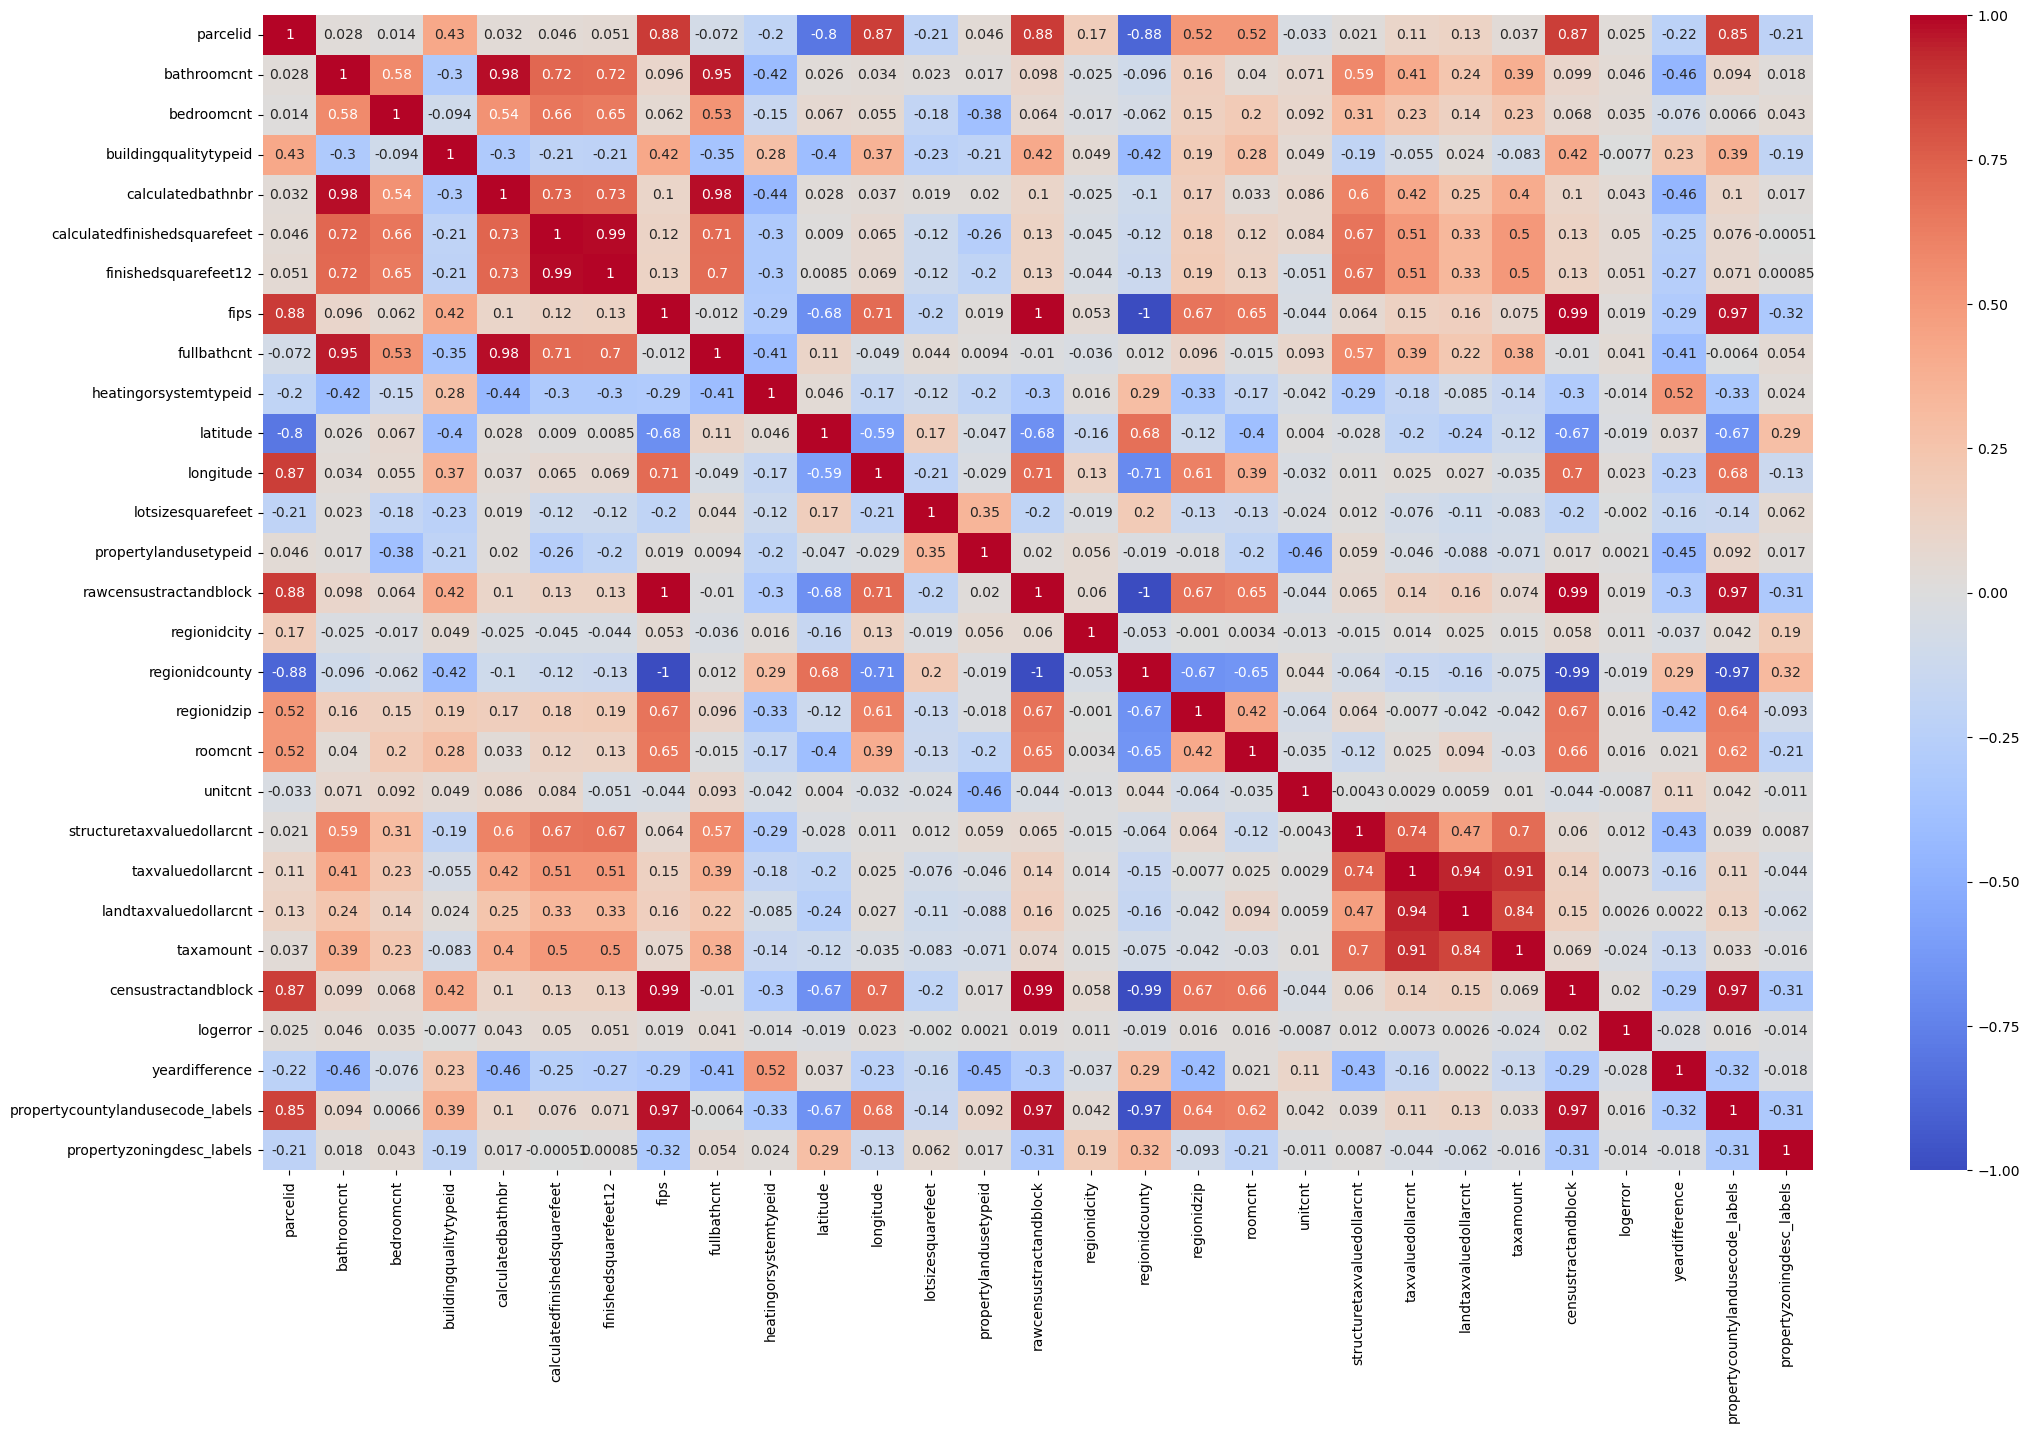

In [198]:
plt.figure(figsize=(25, 15))
sns.heatmap(multi_correlation, cmap='coolwarm', annot=True)

In [ ]:
# From this heatmap, we see high correlation among some of the feature variables. So, we will drop somee of the features and then build our model.

C:\Users\Rishabh Deo Singh\AppData\Local\Temp\ipykernel_3788\2985229371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_out_df.drop(columns=['calculatedbathnbr', 'calculatedfinishedsquarefeet', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'fullbathcnt'], axis=1, inplace=True)


<Axes: >

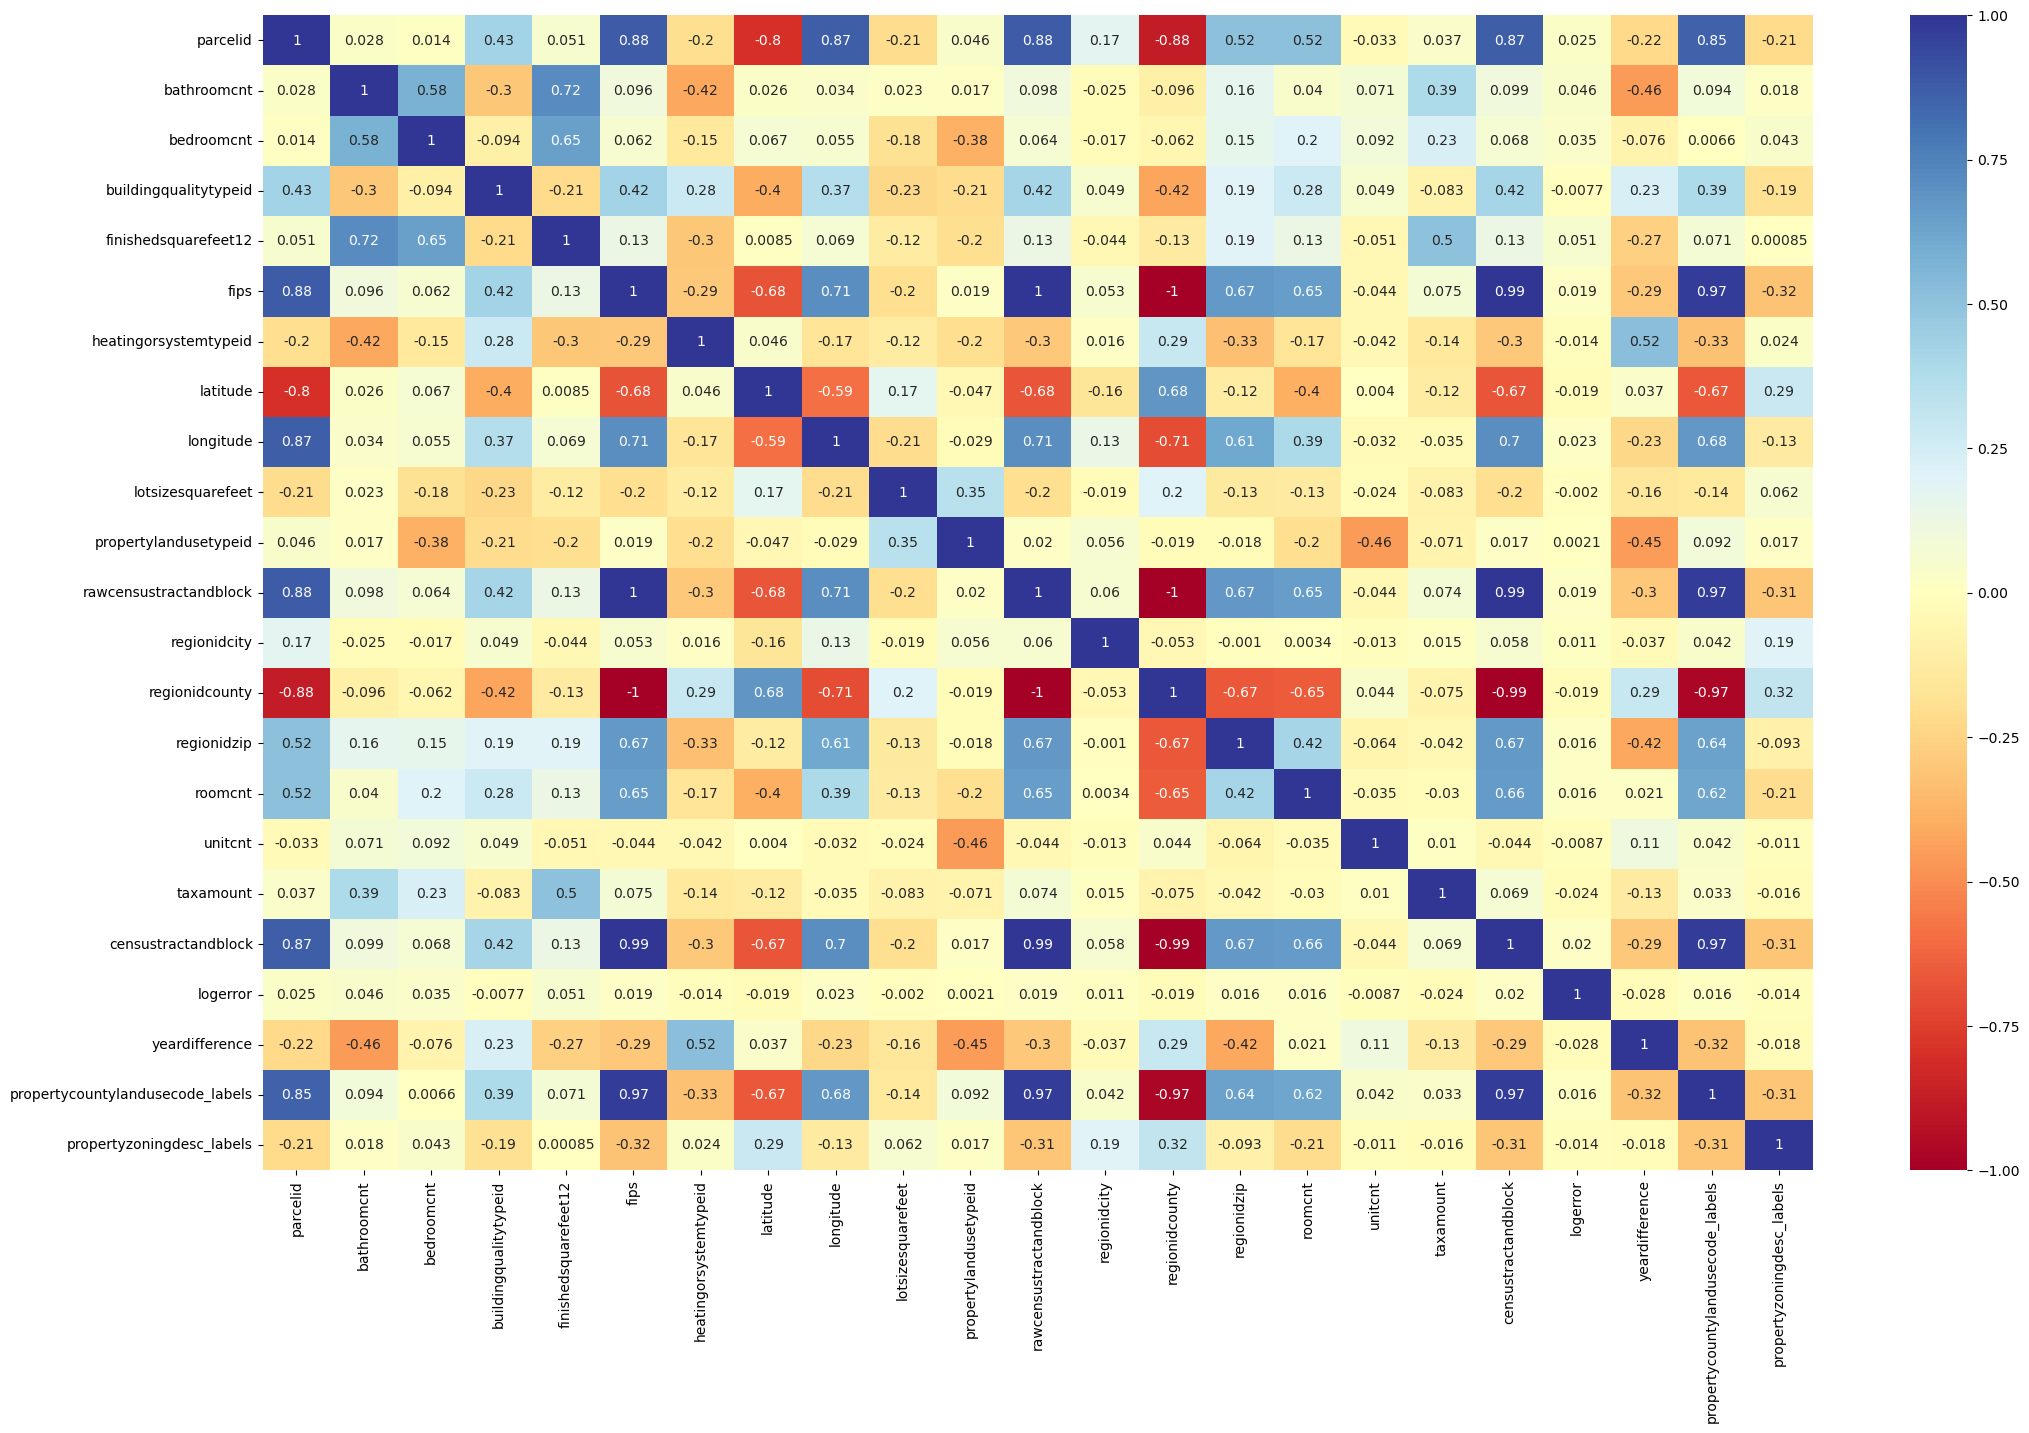

In [199]:
no_out_df.drop(columns=['calculatedbathnbr', 'calculatedfinishedsquarefeet', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'fullbathcnt'], axis=1, inplace=True)

plt.figure(figsize=(25,15))
sns.heatmap(no_out_df.corr(), cmap='RdYlBu', annot=True)

In [ ]:
# DataSet

In [200]:
no_out_df.shape

(70260, 23)

In [201]:
data = no_out_df.copy()

In [202]:
data.shape

(70260, 23)

In [203]:
data.head(10)

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,finishedsquarefeet12,fips,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,...,regionidcounty,regionidzip,roomcnt,unitcnt,taxamount,censustractandblock,logerror,yeardifference,propertycountylandusecode_labels,propertyzoningdesc_labels
26,10726315,3.0,3.0,4.0,2445.0,6037.0,2.0,34.184300,-118.657000,63878.0,...,3101.0,96389.0,0.0,1.0,7170.22,60.371352,0.0383,33.0,9,627
27,10727091,2.0,3.0,7.0,1160.0,6037.0,2.0,34.188121,-118.646361,7688.0,...,3101.0,96342.0,0.0,1.0,5421.96,60.371352,0.0030,55.0,2,638
28,10730788,2.0,4.0,7.0,1570.0,6037.0,2.0,34.188446,-118.616724,11308.0,...,3101.0,96342.0,0.0,1.0,5097.78,60.371351,-0.0020,56.0,2,638
29,10735394,3.0,4.0,4.0,2863.0,6037.0,2.0,34.171439,-118.646883,16376.0,...,3101.0,96389.0,0.0,1.0,7475.21,60.371373,0.0129,52.0,3,632
31,10743512,3.0,2.0,4.0,1394.0,6037.0,2.0,34.152890,-118.791494,77543.0,...,3101.0,96385.0,0.0,1.0,5550.36,60.378003,0.0630,17.0,10,769
32,10760933,2.0,4.0,7.0,1212.0,6037.0,7.0,34.220631,-118.521001,7379.0,...,3101.0,96355.0,0.0,1.0,4560.02,60.371313,-0.1244,61.0,2,609
33,10772282,3.0,4.0,4.0,2597.0,6037.0,2.0,34.209413,-118.578052,10537.0,...,3101.0,96341.0,0.0,1.0,4998.86,60.371341,0.0545,51.0,2,638
34,10783331,2.0,3.0,7.0,1742.0,6037.0,7.0,34.185891,-118.550426,7076.0,...,3101.0,96364.0,0.0,1.0,5784.98,60.371331,0.0070,62.0,2,609
35,10784006,1.0,2.0,7.0,950.0,6037.0,7.0,34.192384,-118.549670,6242.0,...,3101.0,96364.0,0.0,1.0,3441.90,60.371325,0.0611,64.0,2,609
36,10799070,2.0,2.0,4.0,1001.0,6037.0,2.0,34.178100,-118.535000,87177.0,...,3101.0,96379.0,0.0,1.0,3833.83,60.371393,-0.0471,36.0,9,625


In [ ]:
# Due to repetitive data, dropping 1 of rawcensustractandblock and censustractandblock 

In [204]:
data.drop(columns=['censustractandblock', 'propertycountylandusecode_labels'], axis=1, inplace=True)

In [205]:
data.shape

(70260, 21)

In [ ]:
# Saving final data after Feature Engineering

In [206]:
data.to_csv('Zillow_Final_Dataset.csv', index=False)